In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.preprocessing import StandardScaler
import math
import csv
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
#データの取り込み
os.chdir("/Users\sugimoto/Desktop/python/data")
gen = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
#特徴量とラベルに分ける
train_x = train.drop('Survived',axis = 1)
train_y = train['Survived']

In [6]:
train_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


・PassengerIdは番号なので特徴量としては不適切  
・Name,Ticket,Cabinは煩雑な処理が必要なため削除  
・GBDTを使うため欠損値の処理は不要

In [7]:
train_x2 = train_x.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
test2 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

for i in['Sex','Embarked']:
    le = LabelEncoder()
    le.fit(train_x2[i].fillna('NA'))
    
    train_x2[i] = le.transform(train_x2[i].fillna('NA'))
    test2[i] = le.transform(test[i].fillna('NA'))

In [8]:
train_x2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,3
887,1,0,19.0,0,0,30.0000,3
888,3,0,NaN,1,2,23.4500,3
889,1,1,26.0,0,0,30.0000,0


■GBDTのメリット・良さ  
精度が比較的高い  
欠損値を扱える  
不要な特徴量を追加しても精度が落ちにくい  
汎用性が高い（下図を参照）  
LightgbmやXgboostの理解に役立つ  

G... Gradient(勾配)  
B... Boosting(ブースティング) = アンサンブル手法の1つ  
D... Decision(決定)  
T... Tree(木)  
https://www.acceluniverse.com/blog/developers/2019/12/gbdt.html

In [9]:
#https://www.acceluniverse.com/blog/developers/2019/12/gbdt.html

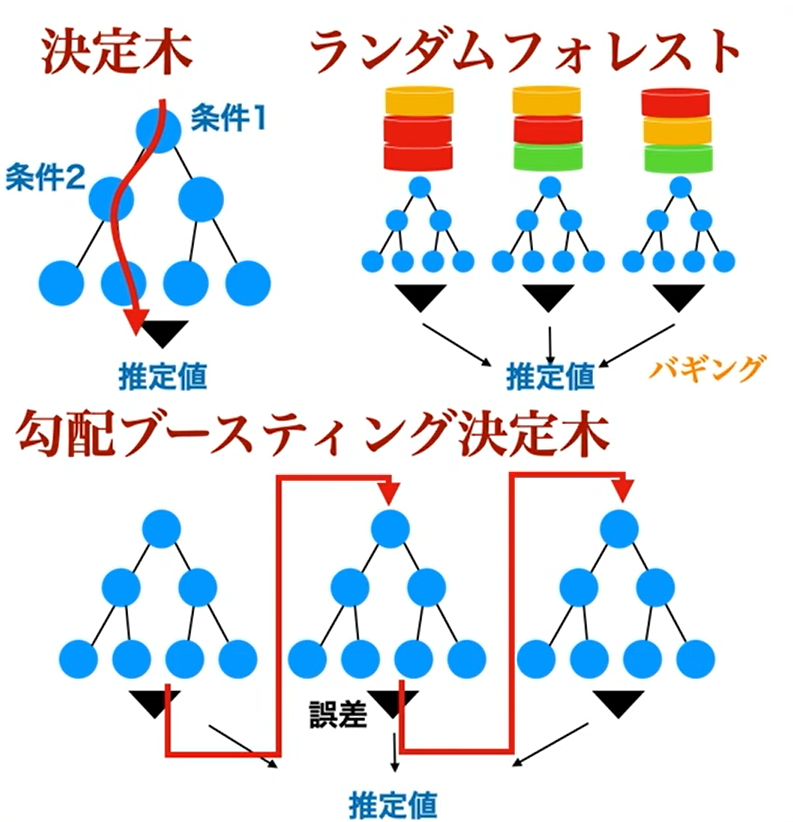

In [10]:
model = XGBClassifier(n_estimators = 2,random_state=71)
model.fit(train_x2,train_y)

[08:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=71, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [11]:
pred = model.predict_proba(test2)[:, 1]
pred_label = np.where(pred>0.5,1,0)

In [12]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_label})

In [13]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [14]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

# 各foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []



# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x2):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x2.iloc[tr_idx], train_x2.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    model = XGBClassifier(n_estimators=20, random_state=71)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    logloss = log_loss(va_y, va_pred)
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}')


[08:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

・Accuracyは予測した値と正解が一致していた数のカウント。  
正解/不正解しかないのでいつも良い指標とは限らない（惜しかった、などが測れない）  

・Log Lossは実際のラベルからどのくらい違っていたのかを考慮できる  
※絶対的な値には意味がなく、相対的な評価しかできない

In [15]:
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}')

logloss: 0.4384, accuracy: 0.8182


In [19]:
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1.0, 2.0, 4.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x2):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x2.iloc[tr_idx], train_x2.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        logloss = log_loss(va_y, va_pred)
        score_folds.append(logloss)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')
# max_depth=7, min_child_weight=2.0のスコアが最もよかった



[08:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [20]:
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')

max_depth: 3, min_child_weight: 2.0
